High Density Regions can be used to find cross sections across a multi-dimensional space that have the highest concentrations of data points. It can also be used to compute the average value of an aggregate statistic with respect to a target variable.

In [1]:
import matplotlib.pyplot as plt

In [2]:
#the package uses numba compile funtions, it may take a few seconds to load
import hdre
import numpy as np
import pandas as pd

In [3]:
from sklearn import datasets,mixture

def generate_MoG_data(num_data, means, covariances, weights):
    """ Creates a list of data points """
    num_clusters = len(weights)
    data = []
    k = np.random.choice(len(weights), num_data, p=weights)
    for i in range(len(weights)):
        cnt = np.sum(k==i)
        x = np.random.multivariate_normal(means[i], covariances[i],size=cnt)
        data.append(x)
    return data


def plt_two_dev_clust():
    for k in range(3):
        i,j=0,1
        w1 = init_means[k][i]
        w2 = init_means[k][j]

        k_cov = np.array(init_covariances[k])
        C = np.array([[k_cov[i,i],k_cov[i,j]],[k_cov[j,i],k_cov[j,j]]])

        eVa, eVe = np.linalg.eig(C)
        R, S = eVe, np.diag(np.sqrt(eVa))

        C = np.array([[k_cov[i,i],k_cov[i,j]],[k_cov[j,i],k_cov[j,j]]])

        eVa, eVe = np.linalg.eig(C)
        R, S = eVe, np.diag(np.sqrt(eVa))
        #create circle (points)
        z = np.linspace(0,2*np.pi,100)

        points = np.array([[np.sin(z[i]),np.cos(z[i])] for i in range(z.shape[0]-1)])
        points = np.concatenate([points,points[:1]])

        #1 std away
        T = (S*2).dot(R.T)
        points = points.dot(T)
        points[:,0] = points[:,0]+w1
        points[:,1] = points[:,1]+w2
        plt.plot(points[:,0],points[:,1],color='#17C350')


init_means = [
    [5, 0], # mean of cluster 1
    [1, 1], # mean of cluster 2
    [0, 5]  # mean of cluster 3
]

init_covariances = [
    [[.5, 0.], [0, .5]], # covariance of cluster 1
    [[.92, .38], [.38, .91]], # covariance of cluster 2
    [[.5, 0.], [0, .5]]  # covariance of cluster 3
]
init_weights = [1/4., 1/2., 1/4.]  # weights of each cluster

X = np.vstack(generate_MoG_data(5000, init_means, init_covariances, init_weights))

In [4]:
"""
HierarchicalDensityFactorization parameters:

number_of_clusters: The number of clusters
bins_per_dimension: The number of histogram bins across each dimensions. This is used for estimating the kernel density function
smoothing_parameter: Increases the bandwidth of the kernel density estimation
min_leaf_samples: Prunes clusters than have less than the minimum number of samples
alpha: Discount factor, 0<alpha<1

"""

'\nHierarchicalDensityFactorization parameters:\n\nnumber_of_clusters: The number of clusters\nbins_per_dimension: The number of histogram bins across each dimensions. This is used for estimating the kernel density function\nsmoothing_parameter: Increases the bandwidth of the kernel density estimation\nmin_leaf_samples: Prunes clusters than have less than the minimum number of samples\nalpha: Discount factor, 0<alpha<1\n\n'

In [5]:
hdf =  hdre.region_estimator.HierarchicalDensityFactorization(num_clusters=16,
                                                                 bins_per_dimension=61,
                                                                 smoothing_parameter=1.,
                                                                 min_leaf_samples=50,
                                                                 alpha=0.5)

hdf.optimize(X,maxiter=12,realizations=10,number_of_random_simulations=100,verbose=True)

realization 0 loss 10.46324401496798 time 0.6119709014892578
realization 1 loss 7.101690094281314 time 0.5799999237060547
realization 2 loss 4.042461172407467 time 0.5640769004821777
realization 3 loss 2.668235553743397 time 0.5719993114471436
realization 4 loss 2.220132035733195 time 0.5655696392059326
realization 5 loss 1.9667948643034834 time 0.5729994773864746
realization 6 loss 1.9844886219175528 time 0.5692746639251709
realization 7 loss 1.7655375992974385 time 0.5820004940032959
realization 8 loss 1.5571660817575093 time 0.5839998722076416
realization 9 loss 1.5010510770749292 time 0.5730876922607422
1 clusters were not assigned data points

550 data points are unassigned
realization 0 loss 9.39957135216949 time 0.6000008583068848
realization 1 loss 5.106193725335837 time 0.5699999332427979
realization 2 loss 3.4581339822165975 time 0.571629524230957
realization 3 loss 2.5785685539645886 time 0.5733568668365479
realization 4 loss 2.383074457452305 time 0.5889987945556641
realiza

In [6]:
"""
The plots below show clusters that were not close to the true distribution. 

These clusters are excluded if the number of data points is less than min_leaf_samples
"""

'\nThe plots below show clusters that were not close to the true distribution. \n\nThese clusters are excluded if the number of data points is less than min_leaf_samples\n'

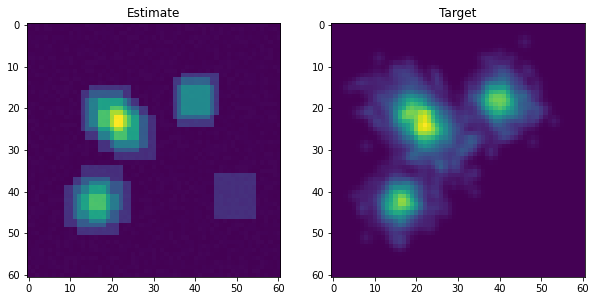

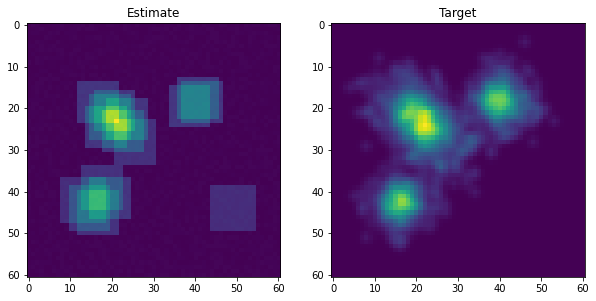

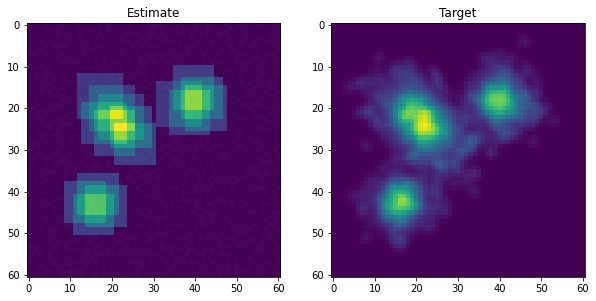

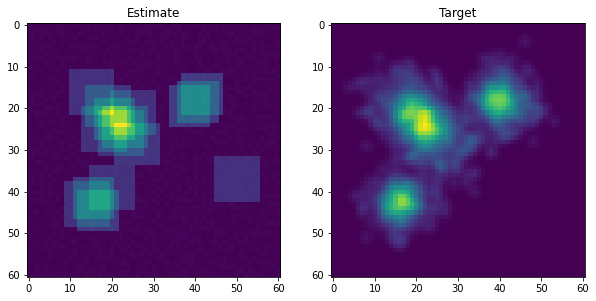

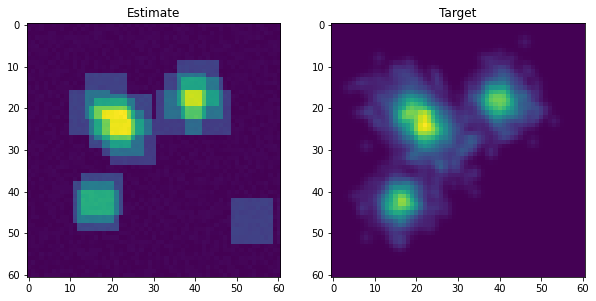

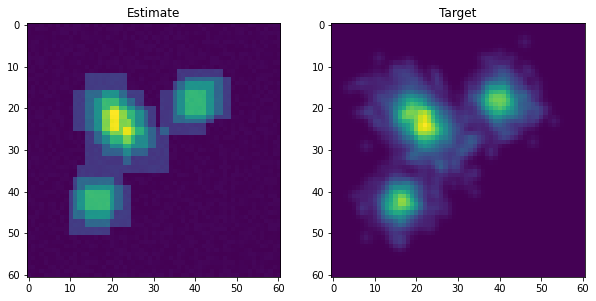

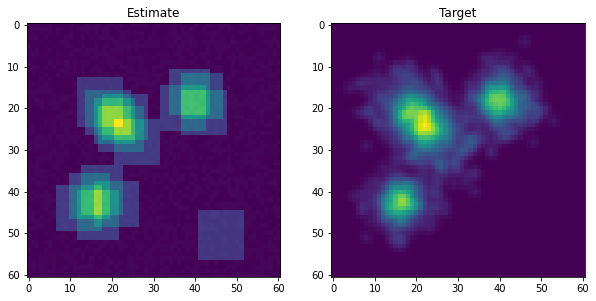

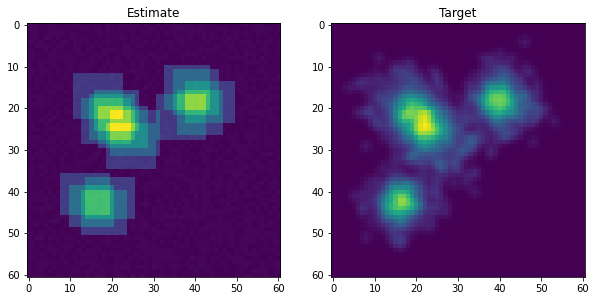

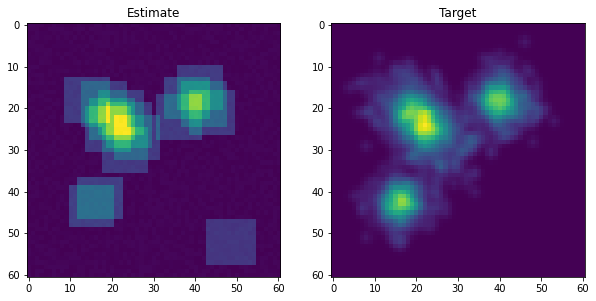

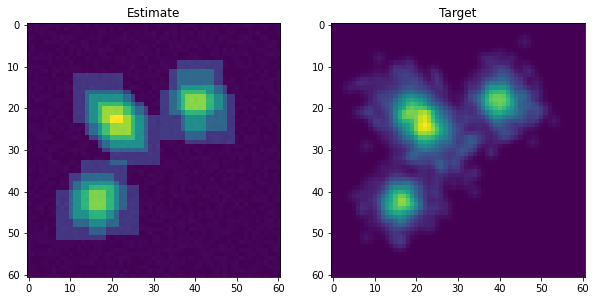

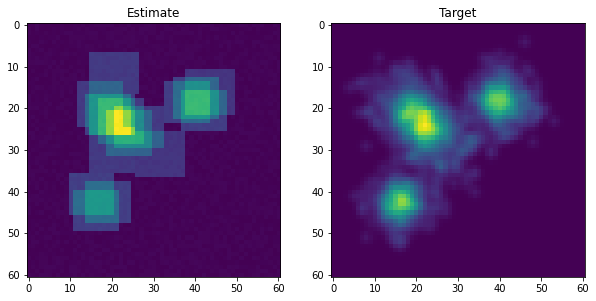

In [7]:
for model in hdf.models:

    count=0
    for i,j in model.dim_combos:
        plt.figure(figsize=(10,10))
        plt.subplot(1,2,1)
        plt.imshow(model.kde_estimate[count])
        plt.title('Estimate')

        plt.subplot(1,2,2)
        plt.imshow(model.kde_target[count])
        plt.title('Target')
        plt.show()
        count+=1

In [8]:
#assignments
A = hdf.assign(X)
#density
D = np.sum(A,axis=1)

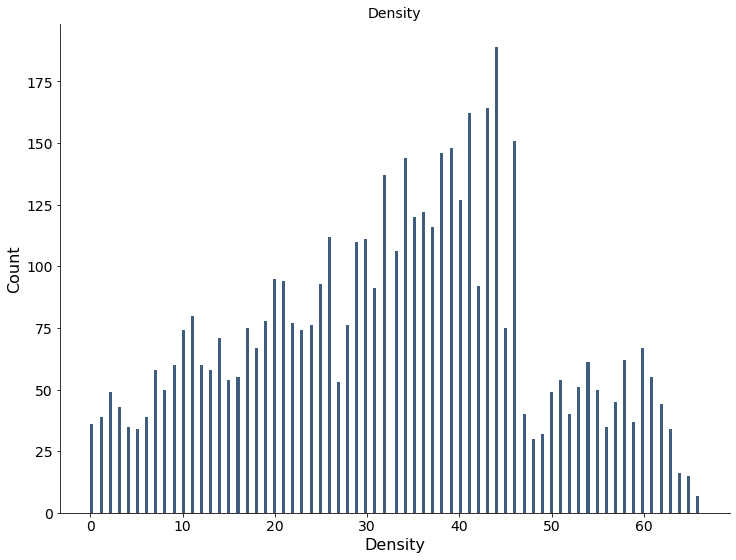

In [9]:

plt.figure(figsize=(12, 9))  

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
    
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title("Density", fontsize=14)  

plt.xlabel("Density", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

pkg = plt.hist(D,  
         color="#3F5D7D", bins=200)  

plt.show()

In [10]:
"""
Visualization of outliers
"""

'\nVisualization of outliers\n'

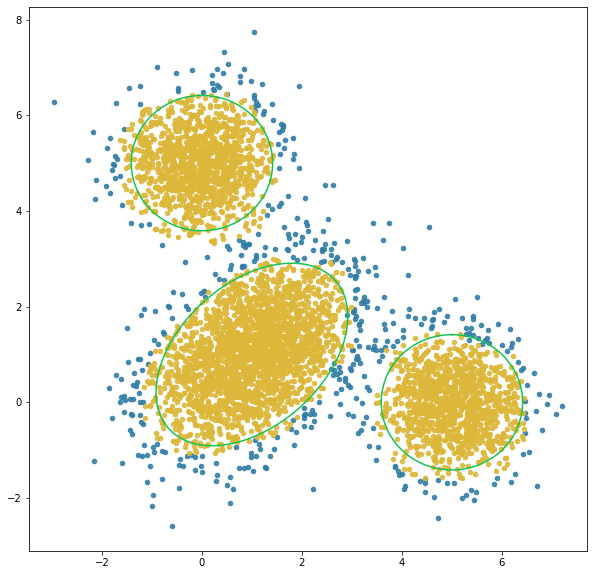

In [11]:
qry=int(np.percentile(D,10))

cond = (D>=qry)


for i,j in hdf.model.dim_combos[:1]:
    plt.figure(figsize=(10,10))

    plt.plot(X[~cond, 0], X[~cond, 1],'.', color='#317DA7', markersize=9, alpha=0.9, label='0-95th percentile')
    plt.plot(X[cond, 0], X[cond, 1],'.', color='#DCB73A', markersize=9, alpha=0.9, label='95-100th percentile')
    
plt_two_dev_clust()

plt.show()



In [12]:

"""
A More Difficult Problem...

As the input space increases in dimensionality, the Euclidean space between data points increases.
For an input space that contain only uniform random variables, the space between space points increase by
a factor of sqrt(D), where D is the number of dimensions.

"""

init_means = [
    [5, 0], # mean of cluster 1
    [1, 1], # mean of cluster 2
    [-5, 0]  # mean of cluster 3
]

init_covariances = [
    [[.5, 0.], [0, .5]], # covariance of cluster 1
    [[.92, .38], [.38, .91]], # covariance of cluster 2
    [[.5, 0.], [0, .5]]  # covariance of cluster 3
]
init_weights = [1/4., 1/2., 1/4.]  # weights of each cluster


Xtrain = np.vstack(generate_MoG_data(3000, init_means, init_covariances, init_weights))
Xtest = np.vstack(generate_MoG_data(500000, init_means, init_covariances, init_weights))

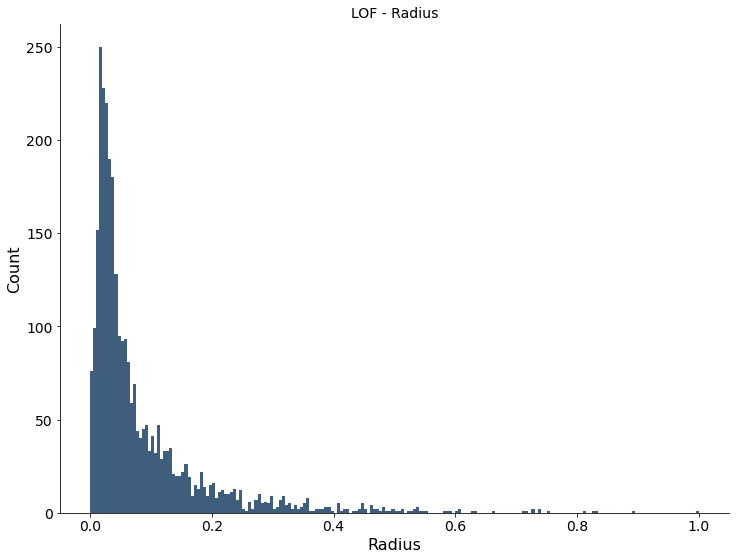

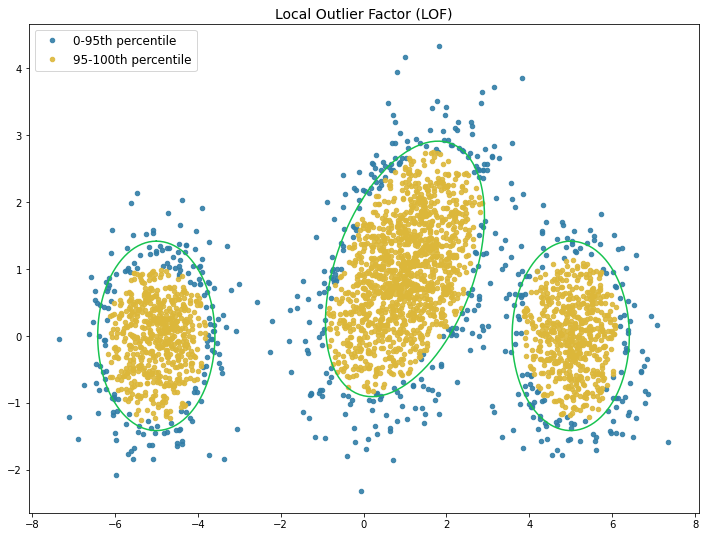

In [13]:

"""
Local Outlier Factor

The quality of the solution depends on the number of nearest neighbors and the contamination

"""

from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=100, contamination=0.2,novelty=True)
ypred = clf.fit(Xtrain).predict(Xtrain)
X_scores = clf.negative_outlier_factor_


radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
#while this provides some information on the level of density for each data point
#it is not availble when predicting on a new training dataset
# qry = np.percentile(radius,95)
# cond = radius>qry

plt.figure(figsize=(12, 9))  

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# plt.ylim(63, 85)  
    
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title("LOF - Radius", fontsize=14)  

plt.xlabel("Radius", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

pkg = plt.hist(radius,  
         color="#3F5D7D", bins=200)  

plt.show()


cond = ypred==1

plt.figure(figsize=(12,9))
plt.title("Local Outlier Factor (LOF)",fontsize=14)


plt.plot(Xtrain[~cond, 0], Xtrain[~cond, 1],'.', color='#317DA7', markersize=9, alpha=0.9, label='0-95th percentile')
plt.plot(Xtrain[cond, 0], Xtrain[cond, 1],'.', color='#DCB73A', markersize=9, alpha=0.9, label='95-100th percentile')


plt_two_dev_clust()

plt.axis('tight')
legend = plt.legend(loc='upper left', prop={'size': 12})
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]

plt.show()

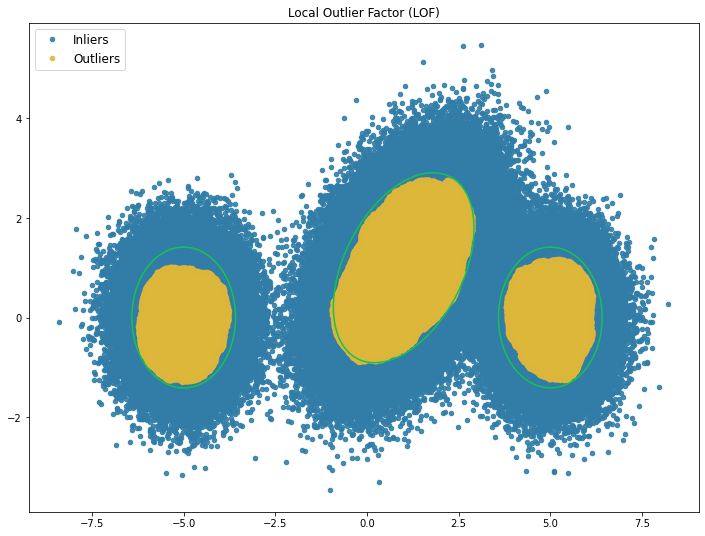

In [14]:
ypred = clf.predict(Xtest)

cond = ypred==1


plt.figure(figsize=(12,9))
plt.title("Local Outlier Factor (LOF)")


plt.plot(Xtest[~cond, 0], Xtest[~cond, 1], '.',color='#317DA7', markersize=9, alpha=0.9, label='Inliers')
plt.plot(Xtest[cond, 0], Xtest[cond, 1], '.', color='#DCB73A', markersize=9, alpha=0.9, label='Outliers')


plt_two_dev_clust()

plt.axis('tight')
legend = plt.legend(loc='upper left', prop={'size': 12})
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]

plt.show()

In [15]:
"""
Compare with Hierarchical Density Factorization
"""

'\nCompare with Hierarchical Density Factorization\n'

In [17]:
hdf =  hdre.region_estimator.HierarchicalDensityFactorization(num_clusters=16,
                                                                 bins_per_dimension=61,
                                                                 smoothing_parameter=1.,
                                                                 min_leaf_samples=int(Xtrain.shape[0]*0.05),
                                                                 alpha=0.5)

hdf.optimize(Xtrain,maxiter=12,realizations=10,number_of_random_simulations=100,verbose=True)

realization 0 loss 9.758590277990006 time 0.638361930847168
realization 1 loss 6.948179796097927 time 0.6169989109039307
realization 2 loss 3.7820757569126133 time 0.6190011501312256
realization 3 loss 2.4686275293404534 time 0.6189987659454346
realization 4 loss 1.3316456823966443 time 0.6093282699584961
realization 5 loss 1.1050318805845978 time 0.6109998226165771
realization 6 loss 1.0391138450390522 time 0.6175718307495117
realization 7 loss 0.968300818542797 time 0.6163060665130615
realization 8 loss 0.9405396811918735 time 0.6139988899230957
realization 9 loss 0.9267874446900096 time 0.6260004043579102
0 clusters were not assigned data points

309 data points are unassigned
realization 0 loss 8.403708189673743 time 0.6565985679626465
realization 1 loss 4.466929248827129 time 0.6259996891021729
realization 2 loss 2.1311792823043207 time 0.6290004253387451
realization 3 loss 1.372620872124695 time 0.6403007507324219
realization 4 loss 1.1546915122194956 time 0.6122472286224365
real

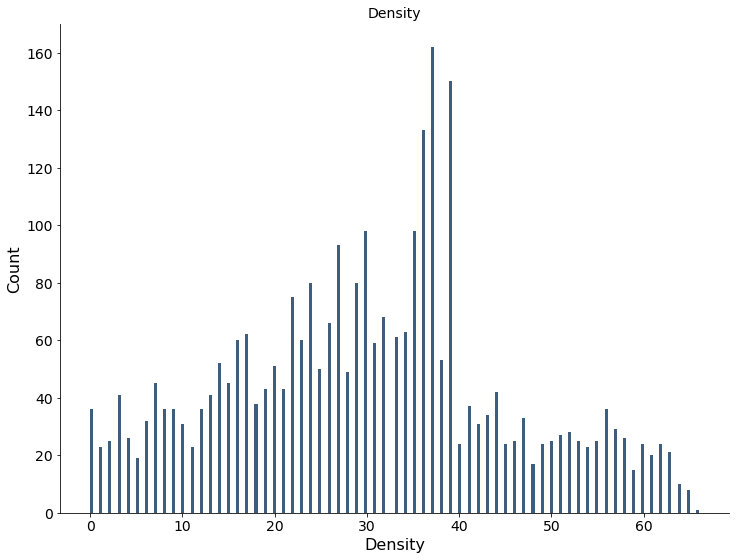

In [18]:
#assignments
A = hdf.assign(Xtrain)
#density
D = np.sum(A,axis=1)

plt.figure(figsize=(12, 9))  

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
    
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title("Density", fontsize=14)  

plt.xlabel("Density", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

pkg = plt.hist(D,  
         color="#3F5D7D", bins=200)  

plt.show()

In [19]:
from matplotlib import cm
viridis = cm.get_cmap('viridis', len(np.unique(D)))
colors = np.linspace(0, 1, len(np.unique(D)))
colordict = dict(zip(np.unique(D), colors)) 
colormap = list(map(lambda x: colordict[x],D))

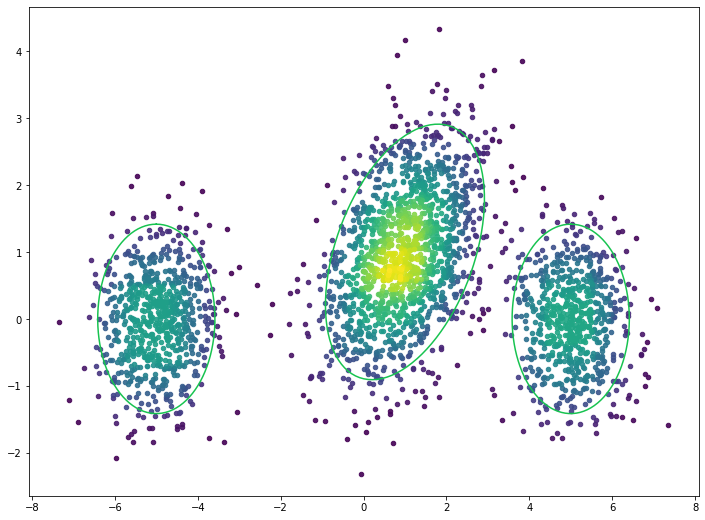

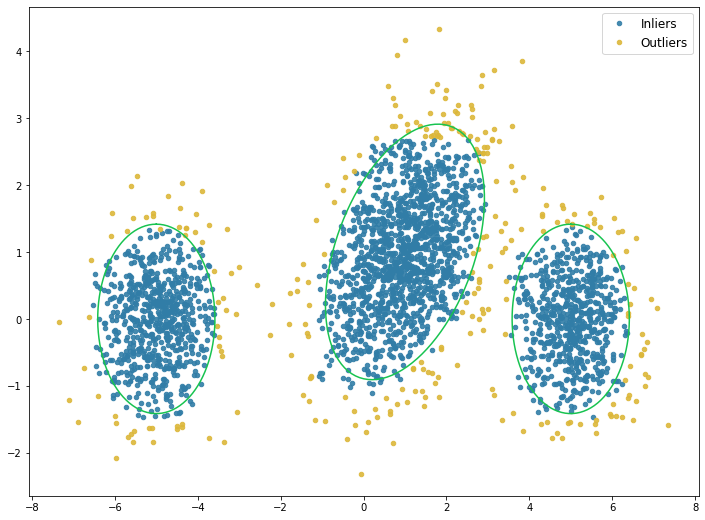

In [20]:
qry=int(np.percentile(D,10))
cond = (D>=qry)


plt.figure(figsize=(12,9))
for i,j in hdf.model.dim_combos[:1]:

    for c in colors:
        plt.plot(Xtrain[(colormap==c),i],Xtrain[(colormap==c),j],'.',c=viridis(c),alpha=0.9, markersize=9)

plt_two_dev_clust()
plt.show()

plt.figure(figsize=(12,9))    
for i,j in hdf.model.dim_combos[:1]:

    plt.plot(Xtrain[cond,i],Xtrain[cond,j],'.',color='#317DA7',alpha=0.9, markersize=9, label='Inliers')
    plt.plot(Xtrain[~cond,i],Xtrain[~cond,j],'.',color='#DCB73A',alpha=0.9, markersize=9, label='Outliers')
    
plt.legend( prop={'size': 12})
plt_two_dev_clust()
plt.show()




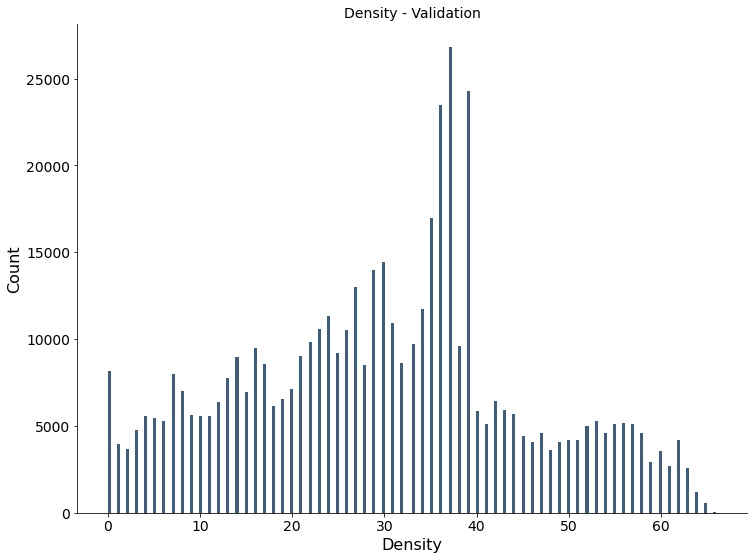

In [22]:
#assignments
A = hdf.assign(Xtest)
#density
D = np.sum(A,axis=1)

plt.figure(figsize=(12, 9))  

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# plt.ylim(63, 85)  
    
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title("Density - Validation", fontsize=14)  

plt.xlabel("Density", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

pkg = plt.hist(D,  
         color="#3F5D7D", bins=200)  

plt.show()

In [23]:
viridis = cm.get_cmap('viridis', len(np.unique(D)))
colors = np.linspace(0, 1, len(np.unique(D)))
colordict = dict(zip(np.unique(D), colors)) 
colormap = list(map(lambda x: colordict[x],D))

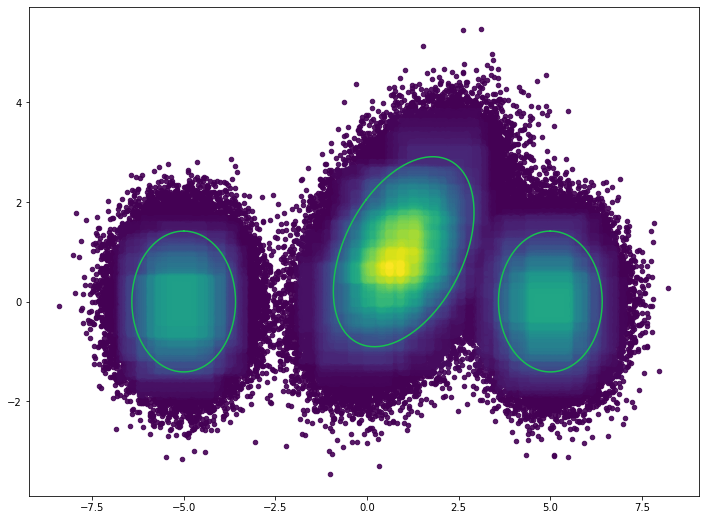

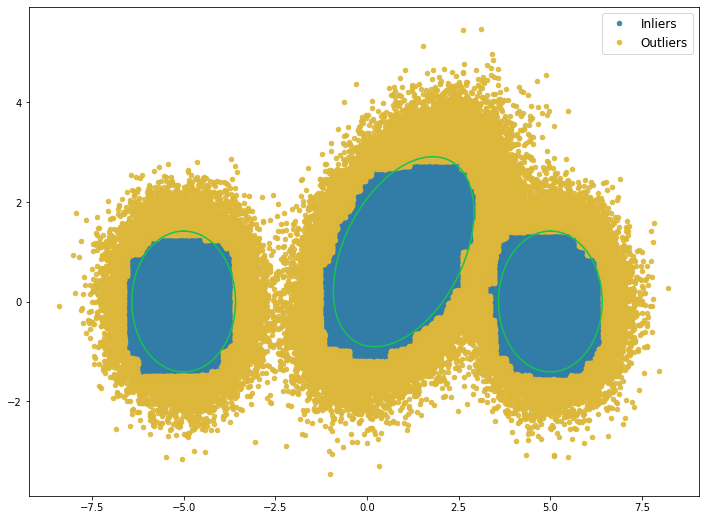

In [24]:
qry=int(np.percentile(D,10))
cond = (D>=qry)


plt.figure(figsize=(12,9))
for i,j in hdf.model.dim_combos[:1]:

    for c in colors:
        plt.plot(Xtest[(colormap==c),i],Xtest[(colormap==c),j],'.',c=viridis(c),alpha=0.9, markersize=9)

plt_two_dev_clust()
plt.show()

plt.figure(figsize=(12,9))    
for i,j in hdf.model.dim_combos[:1]:

    plt.plot(Xtest[cond,i],Xtest[cond,j],'.',color='#317DA7',alpha=0.9, markersize=9, label='Inliers')
    plt.plot(Xtest[~cond,i],Xtest[~cond,j],'.',color='#DCB73A',alpha=0.9, markersize=9, label='Outliers')
    
plt.legend(prop={'size':12})
plt_two_dev_clust()
plt.show()

In [25]:
"""
Multi-dimensional example using the Pokemon dataset. 

Dataset properties:

All the features are continuous
Dimensionality is reduced with PCA prior to fitting density
"""

'\nMulti-dimensional example using the Pokemon dataset. \n\nDataset properties:\n\nAll the features are continuous\nDimensionality is reduced with PCA prior to fitting density\n'

In [27]:
import re
df = pd.read_csv('../data/Pokemon.csv').fillna('')
types = np.concatenate([df['Type 1'].unique(),df['Type 2'].unique()])
df['Type']=df[['Type 1','Type 2']].apply(lambda x: str(x[0])+str(x[1]),axis=1)
df.drop(['Type 1','Type 2'],axis=1,inplace=True)
df['Mega'] = df.Name.apply(lambda x: len(re.findall('Mega',x))>0).astype(np.int)

features = np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed'])

Xtrain = df[features].fillna(0).values.astype(np.float64)

from sklearn import decomposition, preprocessing

pca = decomposition.PCA(4)

sclr = preprocessing.StandardScaler()

Xtrain_t = pca.fit_transform(sclr.fit_transform(Xtrain))

In [28]:
hdf =  hdre.region_estimator.HierarchicalDensityFactorization(num_clusters=16,
                                                                 bins_per_dimension=61,
                                                                 smoothing_parameter=1.,
                                                                 min_leaf_samples=8,
                                                                 alpha=0.5)


hdf.optimize(Xtrain_t,maxiter=15,realizations=15,number_of_random_simulations=100,verbose=True)



realization 0 loss 178.71656850750605 time 0.9529743194580078
realization 1 loss 130.71570076203966 time 0.953355073928833
realization 2 loss 78.96509458564051 time 0.9275763034820557
realization 3 loss 53.990591480164746 time 1.073348045349121
realization 4 loss 42.58758595698136 time 0.9149997234344482
realization 5 loss 34.145465931062425 time 0.9480669498443604
realization 6 loss 26.600257609894037 time 0.9090006351470947
realization 7 loss 23.607764701979136 time 0.9056401252746582
realization 8 loss 21.387627699141742 time 0.8959999084472656
realization 9 loss 19.413601507696832 time 0.9410016536712646
realization 10 loss 18.49066134329497 time 1.0016226768493652
realization 11 loss 16.891617593438657 time 0.9380002021789551
realization 12 loss 15.368059693699266 time 0.9382596015930176
realization 13 loss 14.950185161548585 time 0.984774112701416
realization 14 loss 14.298430357509542 time 0.9373164176940918
0 clusters were not assigned data points

225 data points are unassigne

realization 4 loss 27.678663167275793 time 0.947319507598877
realization 5 loss 24.625020052458105 time 1.053999900817871
realization 6 loss 22.136193939848987 time 0.9646153450012207
realization 7 loss 21.044979899494137 time 0.9869992733001709
realization 8 loss 20.241308324953845 time 0.9843814373016357
realization 9 loss 19.300423571363794 time 1.0149998664855957
realization 10 loss 18.92998332018108 time 0.9766082763671875
realization 11 loss 18.420450921341967 time 0.9935586452484131
realization 12 loss 18.076099935751767 time 0.9820747375488281
realization 13 loss 17.706845139083185 time 1.0020008087158203
realization 14 loss 17.37947392762091 time 0.9631929397583008
0 clusters were not assigned data points

28 data points are unassigned
realization 0 loss 102.85610171342508 time 1.075000524520874
realization 1 loss 76.09087567207305 time 0.9866523742675781
realization 2 loss 46.89249359218012 time 0.9850001335144043
realization 3 loss 34.42942941634153 time 0.9538135528564453
r

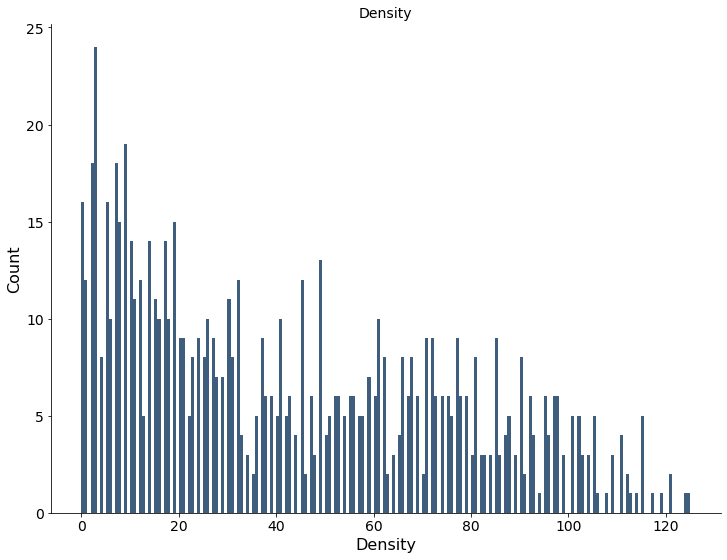

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type,Mega
121,113,Chansey,450,250,5,5,35,105,50,1,False,Normal,0
155,143,Snorlax,540,160,110,65,65,110,30,1,False,Normal,0
164,150,MewtwoMega Mewtwo Y,780,106,150,70,194,120,140,1,True,Psychic,1
217,202,Wobbuffet,405,190,33,58,33,58,33,2,False,Psychic,0
224,208,SteelixMega Steelix,610,75,125,230,55,95,30,2,False,SteelGround,1
230,213,Shuckle,505,20,10,230,10,230,5,2,False,BugRock,0
261,242,Blissey,540,255,10,10,75,135,55,2,False,Normal,0
316,292,Shedinja,236,1,90,45,30,30,40,3,False,BugGhost,0
321,297,Hariyama,474,144,120,60,40,60,50,3,False,Fighting,0
333,306,AggronMega Aggron,630,70,140,230,60,80,50,3,False,Steel,1


In [29]:
A = hdf.assign(Xtrain_t)
D = np.sum(A,axis=1)

plt.figure(figsize=(12, 9))  

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# plt.ylim(63, 85)  
    
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title("Density", fontsize=14)  

plt.xlabel("Density", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

pkg = plt.hist(D,  
         color="#3F5D7D", bins=200)  

plt.show()

df[D==0]

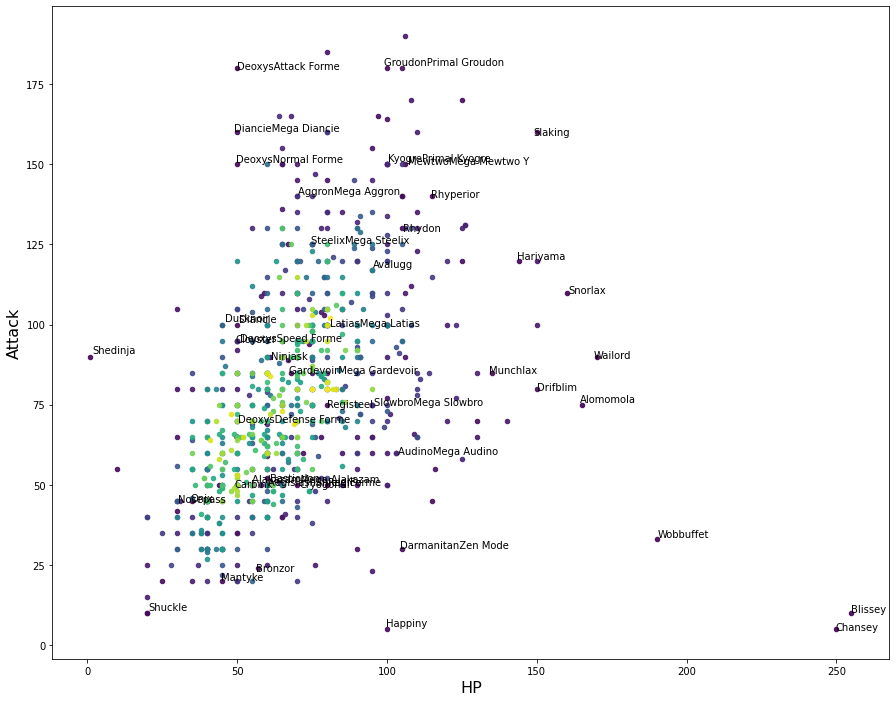

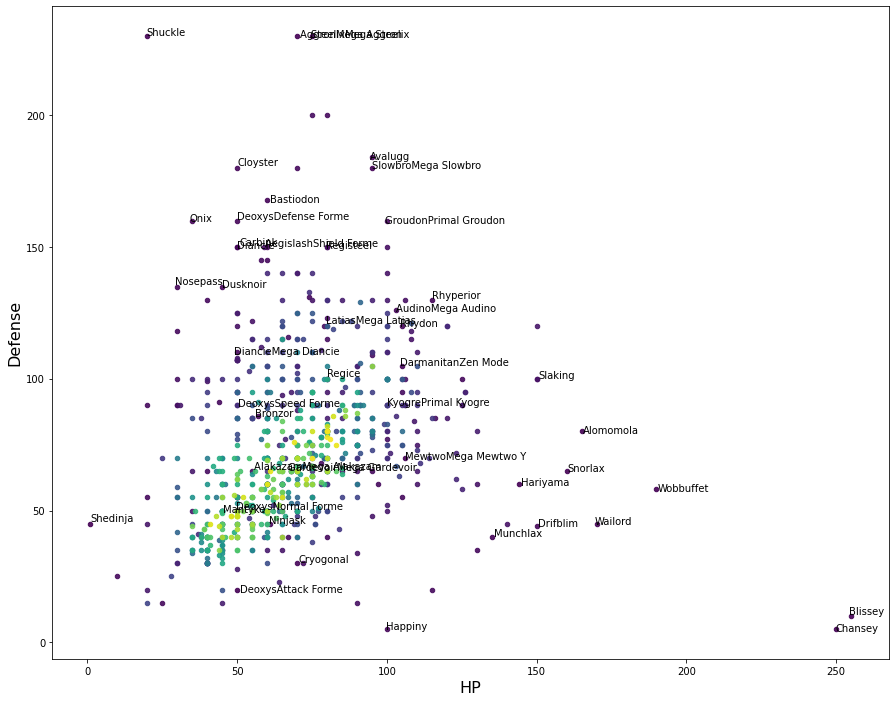

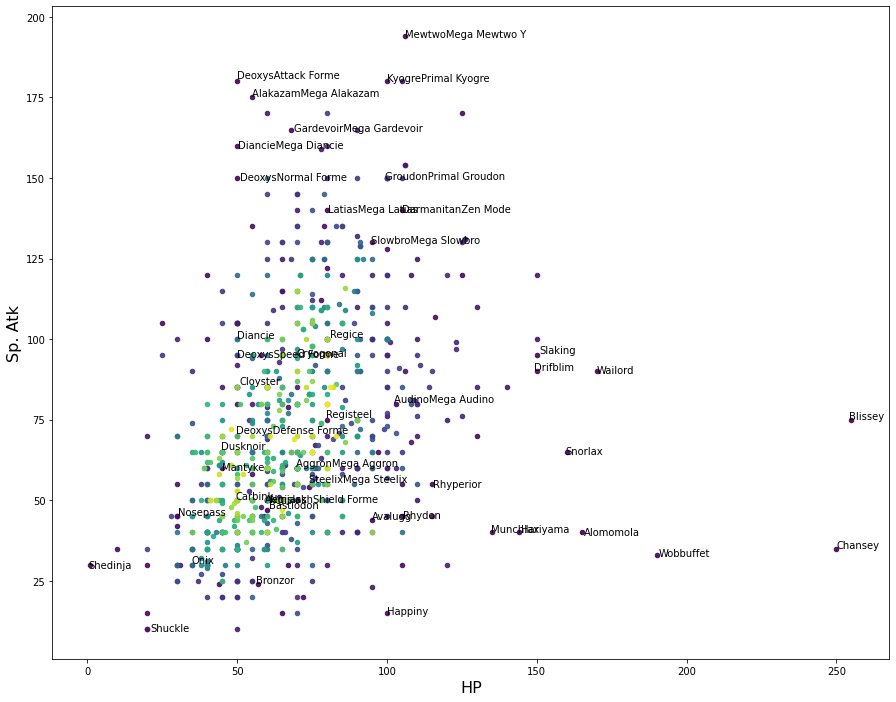

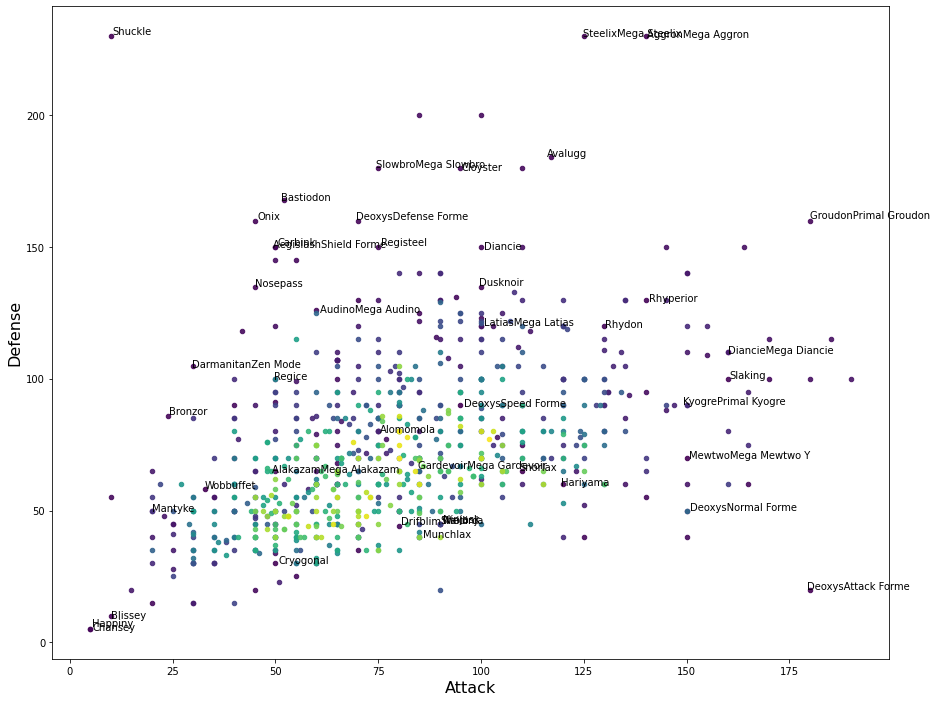

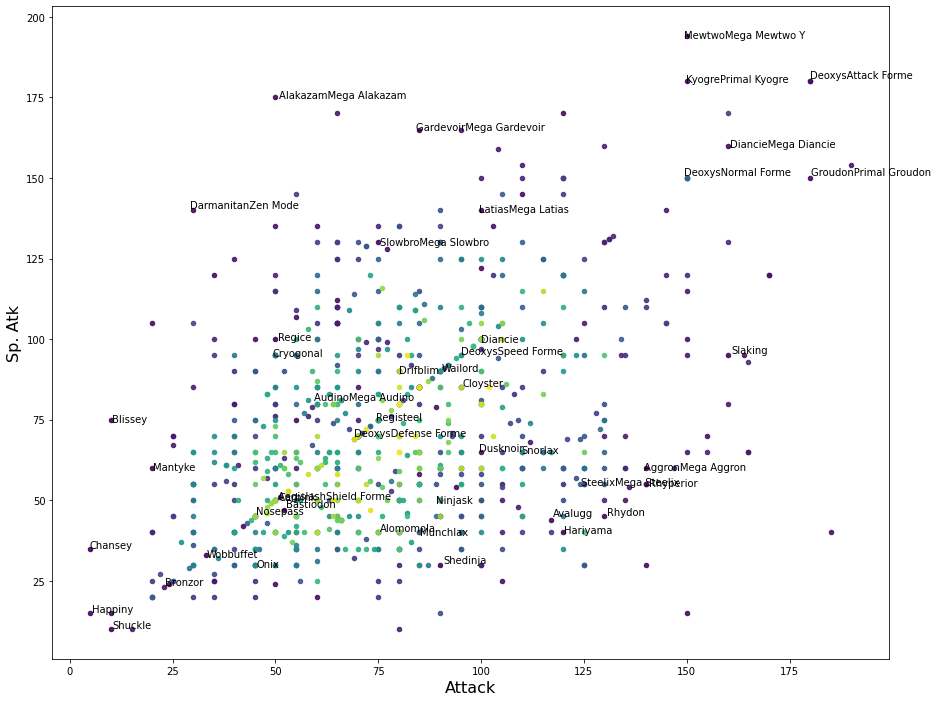

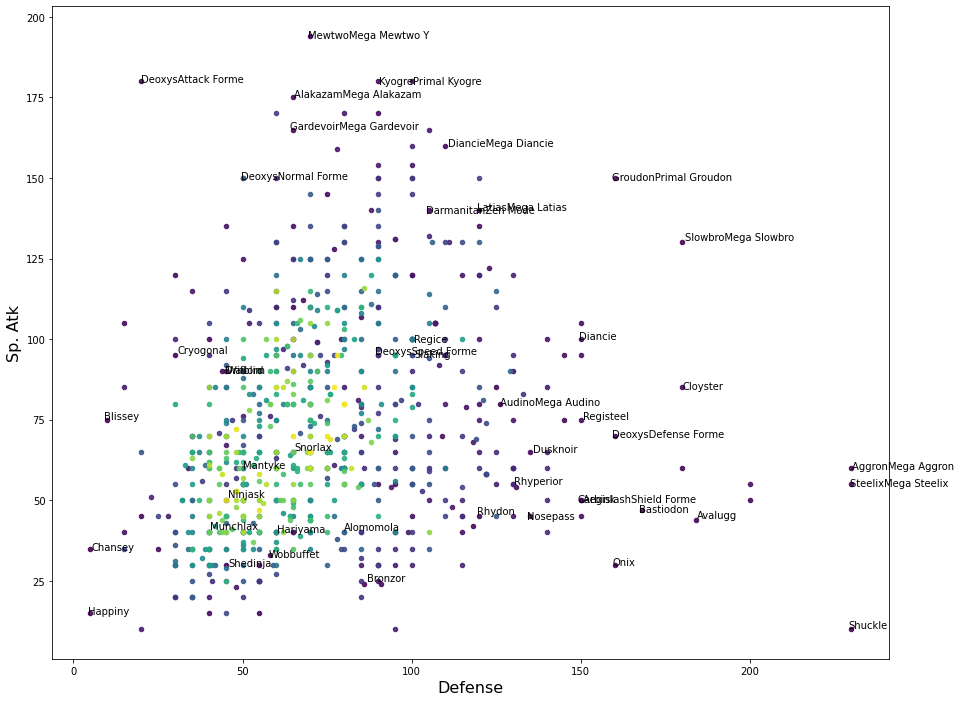

In [30]:
from matplotlib import cm
viridis = cm.get_cmap('viridis', len(np.unique(D)))
colors = np.linspace(0, 1, len(np.unique(D)))
colordict = dict(zip(np.unique(D), colors)) 
colormap = list(map(lambda x: colordict[x],D))


for i,j in hdf.model.dim_combos[:]:
    plt.figure(figsize=(15,12))
    for c in colors:
        plt.plot(Xtrain[(colormap==c),i],Xtrain[(colormap==c),j],'.',c=viridis(c),alpha=0.9, markersize=9)
        
    for z, txt in enumerate(df.Name.values.flatten()):
        if D[z]<=2:
            rand = np.random.uniform
            plt.annotate(txt, (Xtrain[z,i]+rand(-1,1), Xtrain[z,j]+rand(-1,1)),fontsize=10)
            
    plt.xlabel(features[i],fontsize=16)
    plt.ylabel(features[j],fontsize=16)
    plt.show()



In [31]:
"""
Compare with LOF
"""

'\nCompare with LOF\n'

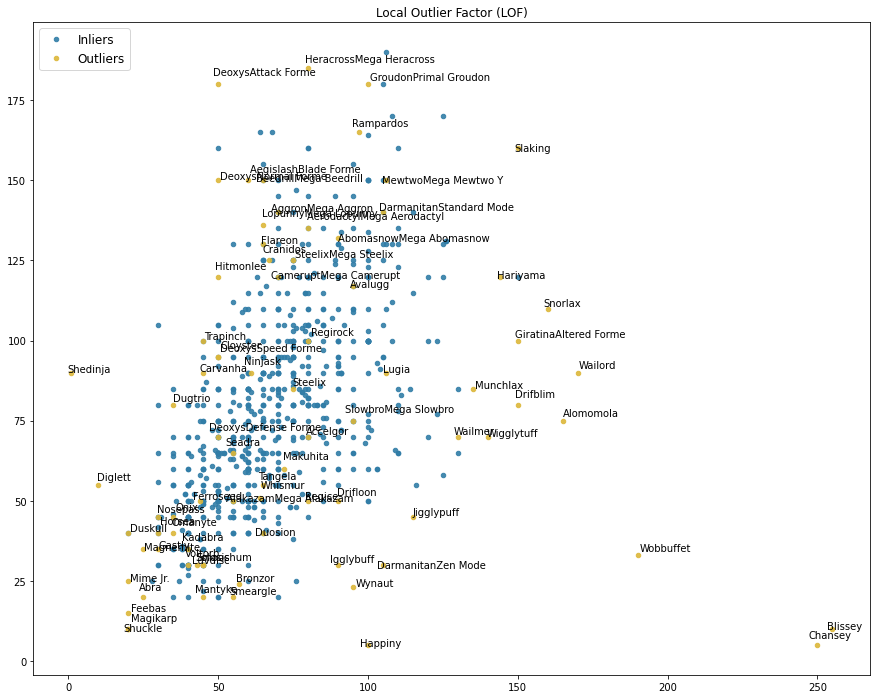

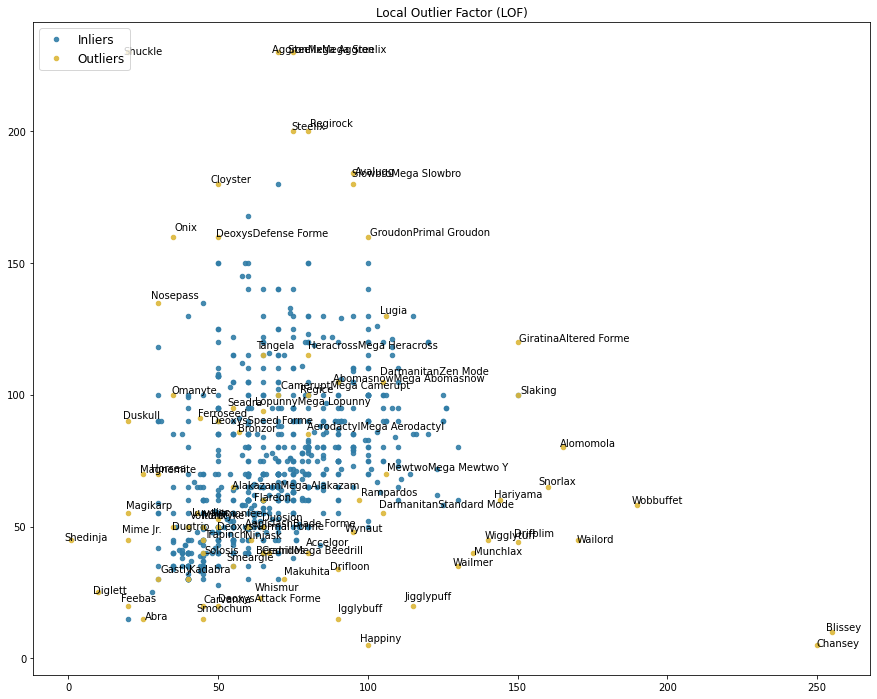

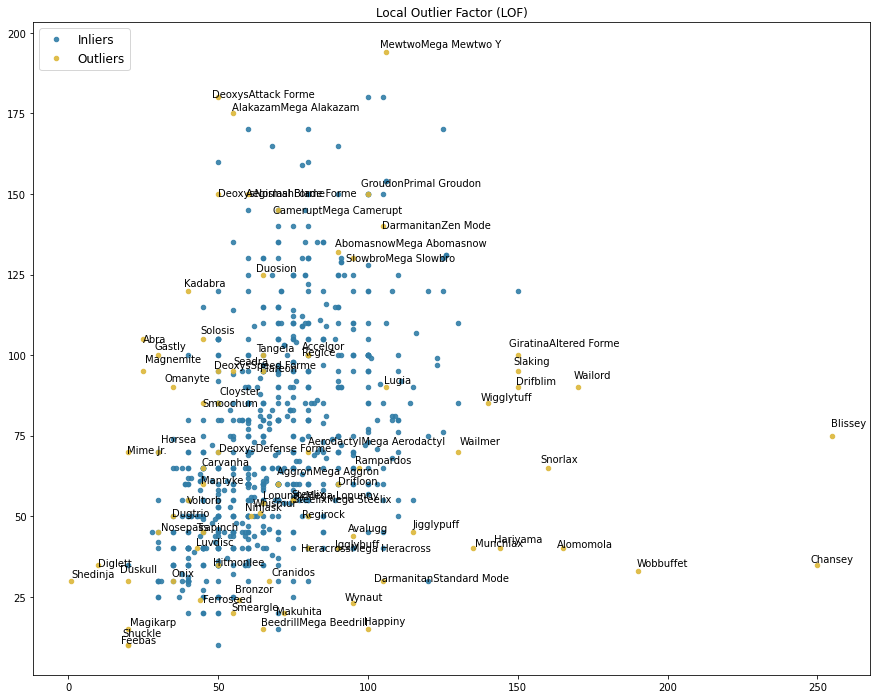

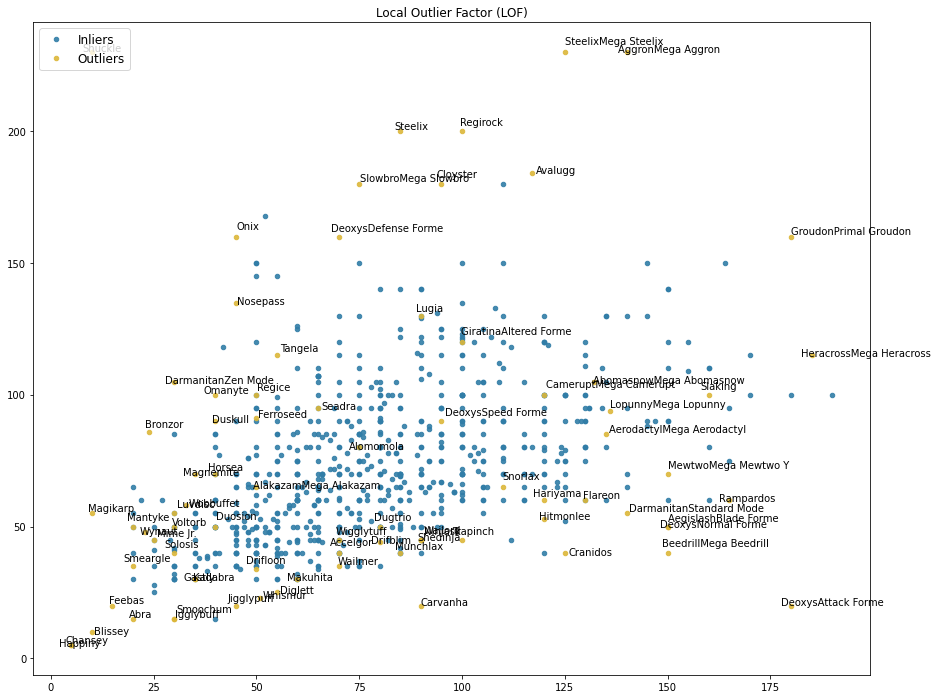

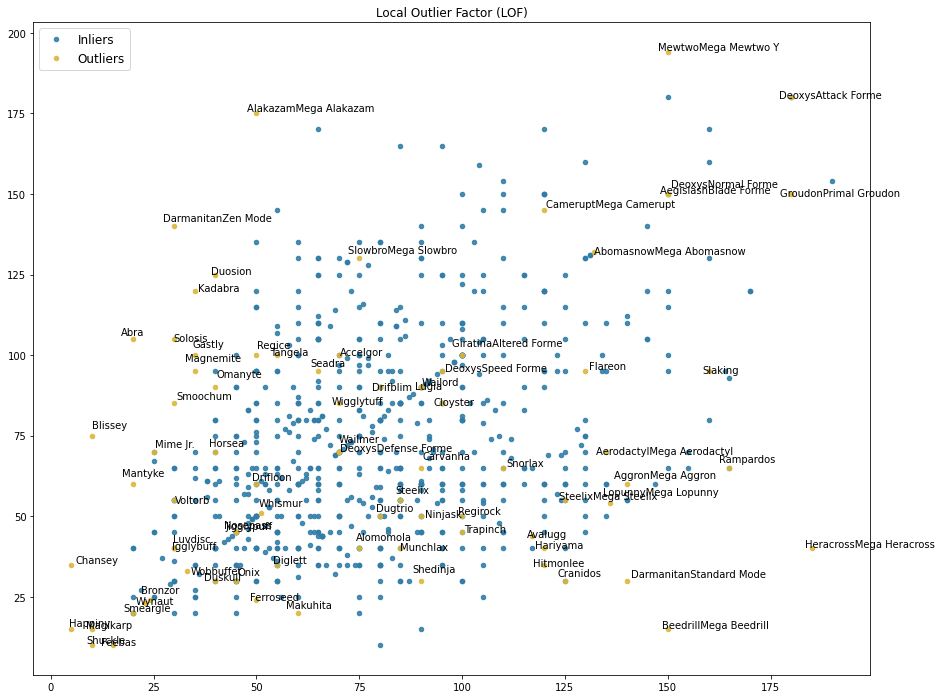

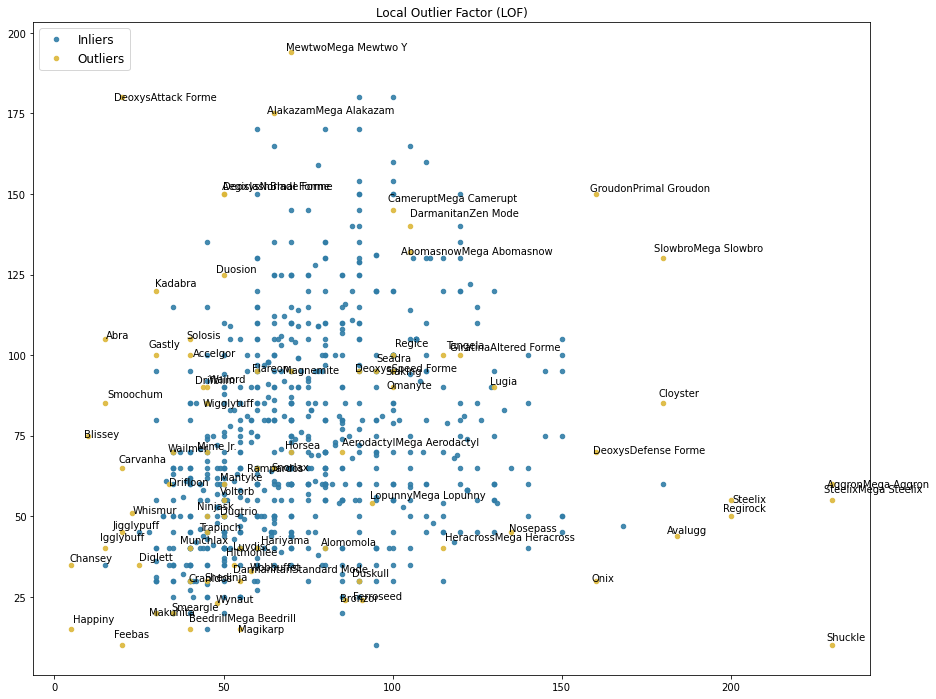

In [32]:
from sklearn.neighbors import LocalOutlierFactor


clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
ypred = clf.fit_predict(Xtrain)
X_scores = clf.negative_outlier_factor_

cond = ypred==1

for i,j in hdf.model.dim_combos[:]:
    plt.figure(figsize=(15,12))
    plt.title("Local Outlier Factor (LOF)")
    plt.plot(Xtrain[cond,i],Xtrain[cond,j],'.',color='#317DA7',alpha=0.9, markersize=9, label='Inliers')
    plt.plot(Xtrain[~cond,i],Xtrain[~cond,j],'.',color='#DCB73A',alpha=0.9, markersize=9, label='Outliers')
    

    for z, txt in enumerate(df.Name.values.flatten()):
        if ypred[z]!=1:
            rand = np.random.uniform
            plt.annotate(txt, (Xtrain[z,i]+rand(-3,1), Xtrain[z,j]+rand(-1,3)),fontsize=10)
    # plot circles with radius proportional to the outlier scores

    # plt.scatter(y[:, 0], y[:, 1], s=1000 * radius, edgecolors='r',
    #             facecolors='none', label='Outlier scores')
    plt.axis('tight')
    # plt.xlim((-5, 5))
    # plt.ylim((-5, 5))
    # plt.xlabel("prediction errors: %d" % (n_errors))
    legend = plt.legend(loc='upper left', prop={'size':12})
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]

In [33]:
hdf_cond = D<=2
lof_cond = ypred!=1

hdf_df = df[hdf_cond]
lof_df = df[lof_cond]

print('density factorization outlier count',hdf_df.shape[0])
print('local outlier factor count',lof_df.shape[0])
print('hdf and lof common outliers',hdf_df[['Name']].merge(lof_df[['Name']],on='Name',how='inner').shape[0])
print('outliers in hdf not in lof',hdf_df[~hdf_df.Name.isin(lof_df.Name)].shape[0])
print('outliers in lof not in hdf',lof_df[~lof_df.Name.isin(hdf_df.Name)].shape[0])

density factorization outlier count 46
local outlier factor count 80
hdf and lof common outliers 32
outliers in hdf not in lof 14
outliers in lof not in hdf 48


In [34]:
"""
Compare outliers in the HDF solution and not in the LOF solution.

The results show that LOF missed a few important outliers.

"""

'\nCompare outliers in the HDF solution and not in the LOF solution.\n\nThe results show that LOF missed a few important outliers.\n\n'

In [35]:
#in density factor not in local factor
hdf_df[~hdf_df.Name.isin(lof_df.Name)]

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type,Mega
120,112,Rhydon,485,105,130,120,45,45,40,1,False,GroundRock,0
306,282,GardevoirMega Gardevoir,618,68,85,65,165,135,100,3,False,PsychicFairy,1
416,379,Registeel,580,80,75,150,75,150,50,3,True,Steel,0
418,380,LatiasMega Latias,700,80,100,120,140,150,110,3,True,DragonPsychic,1
422,382,KyogrePrimal Kyogre,770,100,150,90,180,160,90,3,True,Water,0
456,411,Bastiodon,495,60,52,168,47,138,30,4,False,RockSteel,0
515,464,Rhyperior,535,115,140,130,55,55,40,4,False,GroundRock,0
529,477,Dusknoir,525,45,100,135,65,135,45,4,False,Ghost,0
591,531,AudinoMega Audino,545,103,60,126,80,126,50,5,False,NormalFairy,1
676,615,Cryogonal,485,70,50,30,95,135,105,5,False,Ice,0


In [36]:
"""
Compare outliers in the LOF solution and not in the HDF solution.

The results show that LOF labelled a few normal pokemon as outliers.

"""

'\nCompare outliers in the LOF solution and not in the HDF solution.\n\nThe results show that LOF labelled a few normal pokemon as outliers.\n\n'

In [37]:
#in local outlier factor not in density factor
lof_df[~lof_df.Name.isin(hdf_df.Name)]

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type,Mega
19,15,BeedrillMega Beedrill,495,65,150,40,15,80,145,1,False,BugPoison,1
44,39,Jigglypuff,270,115,45,20,45,25,20,1,False,NormalFairy,0
45,40,Wigglytuff,435,140,70,45,85,50,45,1,False,NormalFairy,0
55,50,Diglett,265,10,55,25,35,45,95,1,False,Ground,0
56,51,Dugtrio,405,35,80,50,50,70,120,1,False,Ground,0
68,63,Abra,310,25,20,15,105,55,90,1,False,Psychic,0
69,64,Kadabra,400,40,35,30,120,70,105,1,False,Psychic,0
88,81,Magnemite,325,25,35,70,95,55,45,1,False,ElectricSteel,0
99,92,Gastly,310,30,35,30,100,35,80,1,False,GhostPoison,0
108,100,Voltorb,330,40,30,50,55,55,100,1,False,Electric,0


In [38]:
"""
Compare specific cases
"""

'\nCompare specific cases\n'

In [39]:
#test sample in local outlier factor and not in density region
from sklearn import neighbors

KNN = neighbors.NearestNeighbors(n_neighbors=10)

qry = 154

KNN.fit(df[features].values)
ind =  KNN.kneighbors(df[features].values[qry:qry+1],return_distance=False)
df.loc[ind.flatten()]

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type,Mega
154,142,AerodactylMega Aerodactyl,615,80,135,85,70,95,150,1,False,RockFlying,1
476,428,LopunnyMega Lopunny,580,65,136,94,54,96,135,4,False,NormalFighting,1
716,648,MeloettaPirouette Forme,600,100,128,90,77,77,128,5,False,NormalFighting,0
700,639,Terrakion,580,91,129,90,72,90,108,5,True,RockFighting,0
512,461,Weavile,510,70,120,65,45,85,125,4,False,DarkIce,0
153,142,Aerodactyl,515,80,105,65,60,75,130,1,False,RockFlying,0
183,169,Crobat,535,85,90,80,70,80,130,2,False,PoisonFlying,0
527,475,GalladeMega Gallade,618,68,165,95,65,115,110,4,False,PsychicFighting,1
132,123,Scyther,500,70,110,80,55,80,105,1,False,BugFlying,0
493,445,Garchomp,600,108,130,95,80,85,102,4,False,DragonGround,0
